In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
%matplotlib notebook

In [2]:
m = 0.1 
r = 0.1
d = 0.3
g = 9.81
psi_dot = 400

In [3]:
I0 = 0.25 * m * r**2 + m * d**2
Iz = 0.5 * m * r**2
theta_0=np.pi/4

In [4]:
y0=[0,0,np.pi/4,0]

In [5]:
p_phi = Iz * psi_dot * np.cos(theta_0)
p_psi = Iz * psi_dot

In [6]:
def System(y, t, psi_dot, theta_0):
    phi, psi, theta, theta_dot = y
    
    
    # Calculate phi_dot
    phi_dot = ((Iz * psi_dot * np.cos(theta_0) - Iz * psi_dot * np.cos(theta))) / (I0 * (np.sin(theta))**2 + Iz * (np.cos(theta))**2)
    
    # Calculate theta_double_dot
    theta_double_dot = (psi_dot**2 * np.sin(theta) * np.cos(theta) * (I0 - Iz) - phi_dot * psi_dot * Iz * np.sin(theta) + m * g * d * np.sin(theta)) / I0

    return [phi_dot, psi_dot, theta_dot, theta_double_dot]


In [7]:
t = np.linspace(0, 8, 2000)

In [8]:
sol = odeint(System, y0, t, args=(psi_dot,theta_0))

In [9]:
phi_sol, psi_sol, theta_sol, theta_dot_sol = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3]

<IPython.core.display.Javascript object>


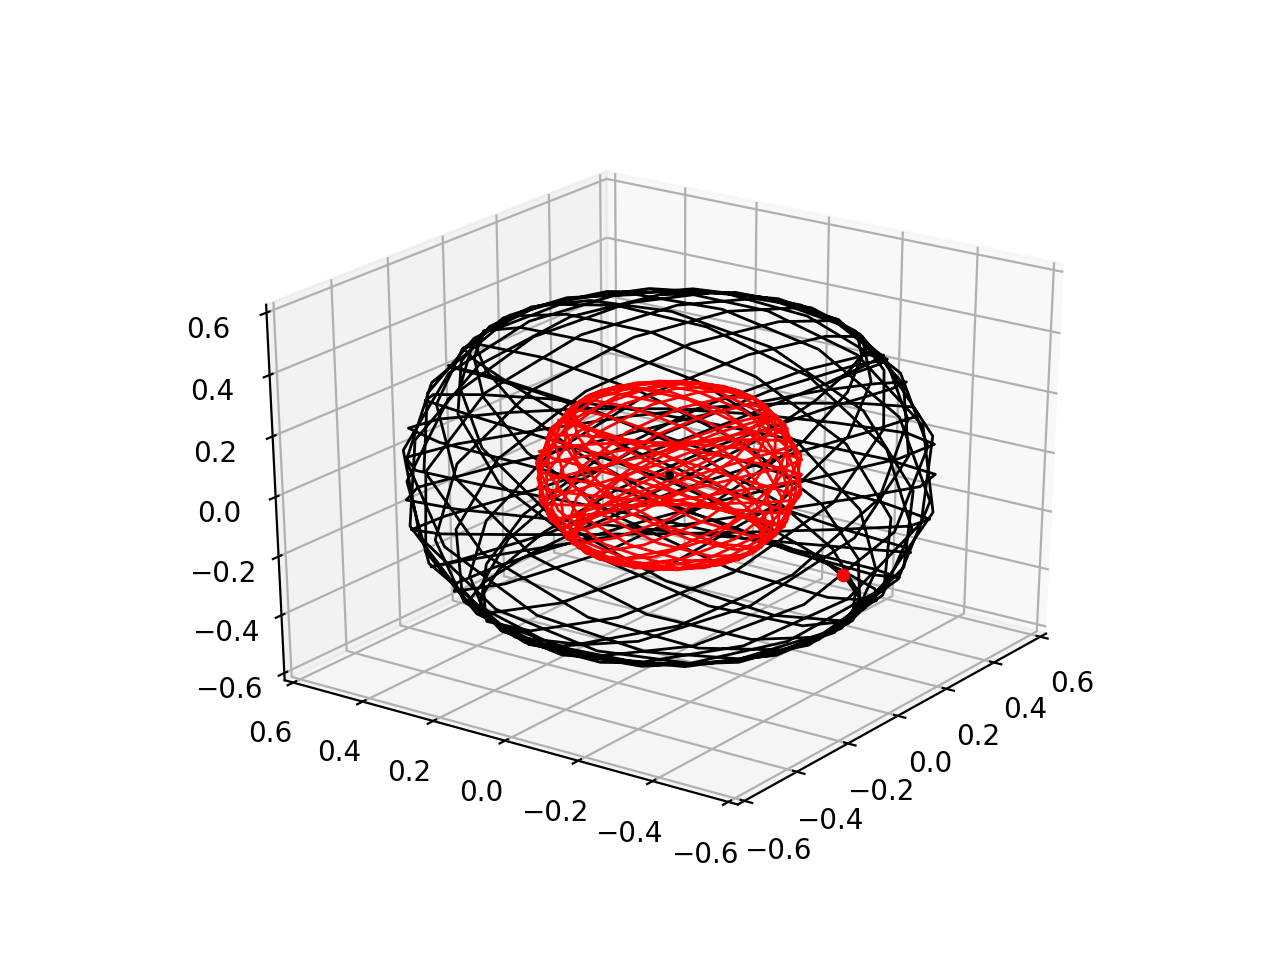

In [13]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(projection='3d')

# Spinning top coordinates
x1 = d*2  # Assuming some arbitrary length
x_top = x1 * np.sin(theta_sol) * np.sin(phi_sol)
y_top = -x1 * np.sin(theta_sol) * np.cos(phi_sol)
z_top = x1 * np.cos(theta_sol)

Z_cm = d  # Arbitrary value for center of mass
x_top_cm = Z_cm * np.sin(theta_sol) * np.sin(phi_sol)
y_top_cm = -Z_cm * np.sin(theta_sol) * np.cos(phi_sol)
z_top_cm = Z_cm * np.cos(theta_sol)

# Animation
xtop_anim = []
ytop_anim = []
ztop_anim = []

xtopcm_anim = []
ytopcm_anim = []
ztopcm_anim = []

def update(i):
    ax.cla()

    xtop_anim.append(x_top[i*5])
    ytop_anim.append(y_top[i*5])
    ztop_anim.append(z_top[i*5])

    xtopcm_anim.append(x_top_cm[i*5])
    ytopcm_anim.append(y_top_cm[i*5])
    ztopcm_anim.append(z_top_cm[i*5])

    ax.scatter(x_top[i*5], y_top[i*5], z_top[i*5], s=15, marker='o', c='r')
    ax.plot(xtop_anim, ytop_anim, ztop_anim, "k", linewidth=1)
    ax.scatter(0, 0, 0, c='k', s=5)  # Fixed bottom point at origin
    ax.plot(xtopcm_anim, ytopcm_anim, ztopcm_anim, "r", linewidth=1)
    ax.plot([0, x_top_cm[i*5]], [0, y_top_cm[i*5]], [0, z_top_cm[i*5]], color='r', linewidth=0.6)

    ax.set_xlim3d(-x1, x1)
    ax.set_ylim3d(-x1, x1)
    ax.set_zlim3d(-x1, x1)

anim = FuncAnimation(fig=fig, func=update, frames=round(len(sol)/5), interval=1000/30, repeat=False)

plt.show()


In [14]:
precession_velocity = np.mean(phi_sol)

print("Precession velocity:", precession_velocity, "rad/s")

Precession velocity: 85.48292014488388 rad/s
